Neural Networks are computational models that mimic the complex functions of the human brain. The neural networks consist of interconnected nodes or neurons that process and learn from data, enabling tasks such as pattern recognition and decision making in machine learning. This lab introduces Tensorflow and demonstrate how NN models are implemented.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron with Sigmoid activation

We can implement a 'logistic neuron' by adding a sigmoid activation by adding a sigmoid "activation" function, similar to logistic regression.

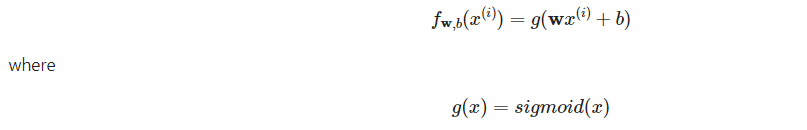



#### We will use a 2-D matrix as an example 

In [ ]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [ ]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

In [ ]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', color='blue', lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

# Tensorflow and Keras Packages

TensorFlow is an open-source machine learning library developed by Google. TensorFlow is used to build and train deep learning models as it facilitates the creation of computational graphs and efficient execution on various hardware platforms. The "Sequential" model is a convenient means of constructing these models.

Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
# A 'logistic neuron' using a sigmoid activation

model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

model.summary() shows the layers and number of parameters in the model. There is only one layer in this model and it has only one unit. The unit has two parameters, w and b. 

In [ ]:
model.summary()

#### Get the weights and bias for the layer

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

#### Defining the logistic neuron 

In [ ]:
def sigmoid_np(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#Setting the weight and bias
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

#### Comparing the prediction with numpy prediction vs logistic layer prediction

In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

alog = sigmoid_np(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)
print(alog)